In [1]:
import pandas as pd
import os
import torch
from utils import make_pie_charts, get_average_prediction_similarity

os.chdir('../')

### load datasets and make sure EC numbers are in the intersection of uniref and CARE from swissprot

In [2]:
uniref_ecs = list(torch.load('data/ec-uniref2level4_onehot.pt').keys())

In [3]:
#load the resampled train dataset
train_metadata = pd.read_csv('data/CARE_resampled50cluster_medium_withTax/train.csv')
#filter to uniref ecs
train_metadata = train_metadata[train_metadata['EC number'].isin(uniref_ecs)]
train_metadata

,Entry,Entry Name,Sequence,EC number,Length,EC All,clusterRes50,clusterRes30,clusterRes70,clusterRes90,EC3,EC2,EC1,cluster50size,weighted_prob_sequence,weighted_prob,Tax number
0,B6YQF6,SYE_AZOPC,MKARVRFAPSPTGPLHIGSIRTALYNYLFAKKYHGDFILRIEDTDS...,6.1.1.17,494,6.1.1.17,A0M6K0,A3DD54,B6YQF6,B6YQF6,6.1.1,6.1,6,12,0.286952,0.286952,2.976.200643.171549.-1.511434.511435
1,Q6GZN7,088R_FRG3G,MHGCNCNRVSGHLSAVRSSGLENGPFGPSGFGPSMWFTMHSGAAER...,1.8.3.2,150,1.8.3.2,Q6GZN7,Q6GZN7,Q6GZN7,Q6GZN7,1.8.3,1.8,1,1,1.000000,1.000000,10239.2732007.2732523.2732555.10486.10492.10493
2,Q9KAH8,ALLB_HALH5,MKRFDLIIRSSTVVTETTTYRADVAIRNGIVSAITEPGSISSDDGP...,3.5.2.5,438,3.5.2.5,Q9KAH8,Q9WYH0,Q9KAH8,Q9KAH8,3.5.2,3.5,3,1,1.000000,1.000000,2.1239.91061.1385.186817.2893055.86665
3,Q58GE8,GPPS_IPSPI,MFKLAQRLPKSVSSLGSQLSKNAPNQLAAATTSQLINTPGIRHKSR...,2.5.1.1,416,2.5.1.1,Q58GE8,Q58GE8,Q58GE8,Q58GE8,2.5.1,2.5,2,1,1.000000,1.000000,2759.6656.50557.7041.7042.55979.-1
4,P20331,ENLYS_BPT3,MAKVQFKPRATTEAIFVHCSATKPSQNVGVREIRQWHKEQGWLDVG...,3.5.1.28,151,3.5.1.28,Q3ZFI3,Q3ZFI3,Q3ZFI3,P20331,3.5.1,3.5,3,4,0.419060,0.419060,10239.2731618.2731619.-1.2731643.2732693.2732707
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
152758,Q8Y914,RIBC_LISMO,MEVSHVTLAPNKDSRAAVLTIGKFDGVHIGHQTILNTALSIKKENE...,2.7.7.2,246,2.7.7.2,Q8Y914,Q8Y914,Q8Y914,Q8Y914,2.7.7,2.7,2,1,1.000000,1.000000,2.1239.91061.1385.186820.1637.1639
152759,Q8ZKL1,RLUF_SALTY,MLTDTSTRLNKYISESGICSRREADRFIEQGNVFINGKRAAIGDQV...,5.4.99.21,289,5.4.99.-; 5.4.99.21,Q83IR6,Q83IR6,Q83IR6,Q8ZKL1,5.4.99,5.4,5,6,0.358197,0.358197,2.1224.1236.91347.543.590.28901
152760,Q0UVK8,NNRD_PHANO,MASATRKDLLKKVYNMVPPMLESFHKGQLGRVAVIGGSEDYTGAPY...,4.2.1.93,325,4.2.1.93,Q5B0D6,B5DHB2,Q0UVK8,Q0UVK8,4.2.1,4.2,4,6,0.358197,0.358197,2759.4890.147541.92860.5020.1351751.13684
152761,Q9RV16,ACCA_DEIRA,MTSTPADALRELEARVRDLEATAERTGQNLDAALAPLRTQLETLRR...,2.1.3.15,316,2.1.3.15,Q9RV16,Q5LME7,Q9RV16,Q9RV16,2.1.3,2.1,2,1,1.000000,1.000000,2.1297.188787.118964.183710.1298.1299


In [4]:
test_metadata = pd.read_csv('data/CARE_resampled50cluster_medium_withTax/test.csv')
#filter to uniref ecs
test_metadata = test_metadata[test_metadata['EC number'].isin(uniref_ecs)]
test_metadata

,Entry,Entry Name,Sequence,EC number,Length,EC All,clusterRes50,clusterRes30,clusterRes70,clusterRes90,EC3,EC2,EC1,cluster50size,weighted_prob_sequence,weighted_prob,Tax number
0,A0A1D8PPK1,EBP1_CANAL,MTIESTNSFVVPSDTELIDVTPLGSTKLFQPIKVGNNVLPQRIAYV...,1.6.99.1,407,1.6.99.1,P43084,Q09671,P43084,P43084,1.6.99,1.6,1,2,0.590616,0.590616,2759.4890.4891.4892.766764.5475.5476
1,A0A1J1DL12,RIDA_DERFA,MSPKRIISTPLAPQPIGPYSQAVQVGNTVYLSGQIGMNVRTNEMVT...,3.5.99.10,128,3.5.99.10,A0A1J1DL12,P37552,A0A1J1DL12,A0A1J1DL12,3.5.99,3.5,3,6,0.358197,0.358197,2759.6656.6854.83137.6952.6953.-1
2,A0A1L5YRA2,TPIS_SCYPA,MANQRKFFVGGNWKMNGDKAAIDGIISFMKGPLNADTEVVVGCPQC...,5.3.1.1,248,4.2.3.3; 5.3.1.1,P48491,B0K880,A0A1L5YRA2,A0A1L5YRA2,5.3.1,5.3,5,85,0.183734,0.183734,2759.6656.6681.6683.6757.6760.-1
3,A0A1V0E492,TPS1_PIPNI,MACVSDLVAFTQPLIIGAKPLEIVRRSAAFHPNVWGDYFLKLSQDE...,4.2.3.104,559,4.2.3.104; 4.2.3.57,A0A1V0E492,Q8GUE4,A0A1V0E492,A0A1V0E492,4.2.3,4.2,4,2,0.590616,0.590616,2759.35493.3398.16736.16739.13215.-1
4,A0A5S9I252,TATC6_HYPAT,MGQPTTTSLFMRDVMFHRMTGTSQAVNDVATLSGERREIIRRALNK...,4.2.3.104,386,4.2.3.-; 4.2.3.104; 4.2.3.137; 4.2.3.157; 4.2....,A0A5S9I252,A0A5S9I252,A0A5S9I252,A0A5S9I252,4.2.3,4.2,4,5,0.383224,0.383224,2759.4890.147550.5125.5129.5543.-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5709,Q9ZKB5,HCPC_HELPJ,MLENVKKSLFRVLCLGALCLGGLMAEQDPKELVGLGAKSYKEQDFT...,3.5.2.6,290,3.5.2.6,Q9ZMM1,Q9ZMM1,Q9ZKB5,Q9ZKB5,3.5.2,3.5,3,4,0.419060,0.419060,2.29547.3031852.213849.72293.209.210
5710,Q9ZKZ2,GUAC_HELPJ,MKVFDYEDVQLIPNKCIVNSRSECDTTVILGKHAFKMPIVPANMQT...,1.7.1.7,325,1.7.1.7,A1WIJ3,A1WIJ3,B1IC44,O25525,1.7.1,1.7,1,82,0.184955,0.184955,2.29547.3031852.213849.72293.209.210
5711,Q9ZMJ9,HCPE_HELPJ,MNIKILKILVGGLFFLSLNAHLWGKQDNSFLGIGERAYKSGNYSKA...,3.5.2.6,355,3.5.2.6,Q9ZMJ9,Q9ZMJ9,Q9ZMJ9,Q9ZMJ9,3.5.2,3.5,3,2,0.590616,0.590616,2.29547.3031852.213849.72293.209.210
5712,Q9ZMY5,MQO_HELPJ,MSMEFDAVIIGGGVSGCATFYTLSEYSSLKRVAIVEKCSKLAQISS...,1.1.5.4,450,1.1.5.4,O24913,P56954,O24913,O24913,1.1.5,1.1,1,5,0.383224,0.383224,2.29547.3031852.213849.72293.209.210


### sample the common ones

In [5]:
#find the EC numbers with value counts > 500
sampled_common = train_metadata['EC number'].value_counts()[train_metadata['EC number'].value_counts() > 500].sample(24, random_state=42).index.tolist()
sampled_common

['2.7.1.148',
 '2.7.13.3',
 '6.1.1.15',
 '1.2.1.70',
 '2.5.1.75',
 '2.7.4.3',
 '4.2.99.18',
 '4.2.1.33',
 '4.2.1.20',
 '2.7.11.1',
 '7.1.2.2',
 '2.4.1.227',
 '3.1.3.16',
 '6.1.1.16',
 '3.5.1.2',
 '3.6.1.27',
 '5.2.1.8',
 '7.1.1.2',
 '6.1.1.20',
 '2.7.7.6',
 '3.1.1.29',
 '6.1.1.21',
 '2.7.1.33',
 '2.7.4.9']

In [6]:
#save to a txt file
with open('data/ECs_generation/train_common_ecs.txt', 'w') as f:
    for item in sampled_common:
        f.write("%s\n" % item)

### sample the rare ones
supplement the old results witha few new ones (how it was being processed before)

In [7]:
train_df = pd.read_csv('data/CARE_resampled50cluster_medium_withTax/train.csv')
value_counts_df = pd.DataFrame(train_df['EC number'].value_counts()).reset_index()
sampled_df = value_counts_df[value_counts_df['count'] <= 10].sample(20, random_state=42)
sampled_df = sampled_df[sampled_df['EC number'].isin(uniref_ecs)]
sampled_rare = sampled_df['EC number'].values.tolist()
sampled_df

,EC number,count
2431,4.4.1.37,5
2816,2.7.7.91,4
2384,2.7.8.47,5
1941,1.1.1.21,8
4187,3.7.1.9,1
3307,2.6.1.114,3
2712,3.1.2.31,4
3188,2.3.1.175,3
4016,3.4.23.39,1
2676,6.3.3.5,4


In [8]:
#supplement with 6 more rare ECs with only one value
# sampled_rare = train_metadata['EC number'].value_counts()[train_metadata['EC number'].value_counts() < 10].sample(24, random_state=42).index.tolist()
#sampled_rare = train_metadata['EC number'].value_counts()[train_metadata['EC number'].value_counts() <= 10].sample(24, random_state=42).index.tolist()
sampled_rare_supplement = train_metadata['EC number'].value_counts()[train_metadata['EC number'].value_counts() == 1].sample(24, random_state=42).index.tolist()[:6]
train_metadata['EC number'].value_counts()[sampled_rare_supplement]

EC number
2.8.2.38      1
1.2.1.83      1
3.4.21.32     1
1.14.14.99    1
4.1.2.44      1
1.1.3.48      1
Name: count, dtype: int64

In [9]:
sampled_rare = sampled_rare + sampled_rare_supplement
len(sampled_rare)

24

In [42]:
#save to a txt file
with open('data/ECs_generation/train_rare_ecs.txt', 'w') as f:
    for item in sampled_rare:
        f.write("%s\n" % item)

### sample test ECs
with varying distance (in reaction similarity) to the train set

In [10]:
#choose reference ECs to be the most common EC classes
reference_ECs = train_metadata['EC number'].value_counts()[train_metadata['EC number'].value_counts() > 300].index.tolist()

#alternatively use all as references
#reference_ECs = train_metadata['EC number'].unique().tolist()

ec2encoding = torch.load('data/ec2drfp.pt')

In [11]:
#subset test_metaata to only unique EC numbers
unique_test_metadata = test_metadata.drop_duplicates(subset=['EC number'])
unique_test_metadata['prediction_similarity'] = unique_test_metadata.apply(lambda x: get_average_prediction_similarity(x['EC number'], reference_ECs, ec2encoding), axis=1)

/tmp/ipykernel_1462798/2738665962.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_test_metadata['prediction_similarity'] = unique_test_metadata.apply(lambda x: get_average_prediction_similarity(x['EC number'], reference_ECs, ec2encoding), axis=1)


<Axes: >

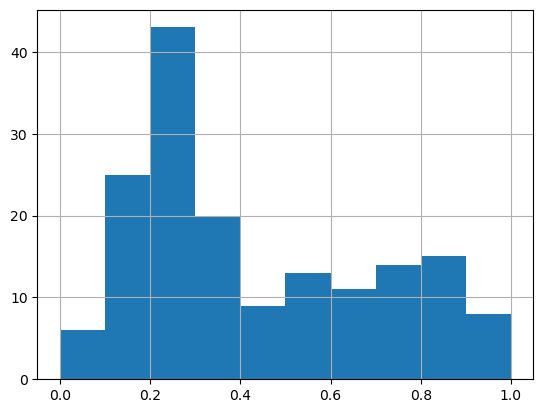

In [12]:
unique_test_metadata['prediction_similarity'].hist()

In [13]:
#group prediction similarities into tiers based on the value
unique_test_metadata['tier'] = pd.cut(unique_test_metadata['prediction_similarity'], bins=[-1, 0.3, 0.5, 0.7, 0.9], labels=['low', 'medium-low', 'medium-high', 'high'])
#sample 6 from each tier
sampled_test_metadata = unique_test_metadata.groupby('tier').apply(lambda x: x.sample(6, random_state=42)).reset_index(drop=True)
sampled_test_metadata

/tmp/ipykernel_1462798/3508181993.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  unique_test_metadata['tier'] = pd.cut(unique_test_metadata['prediction_similarity'], bins=[-1, 0.3, 0.5, 0.7, 0.9], labels=['low', 'medium-low', 'medium-high', 'high'])
/tmp/ipykernel_1462798/3508181993.py:4: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  sampled_test_metadata = unique_test_metadata.groupby('tier').apply(lambda x: x.sample(6, random_state=42)).reset_index(drop=True)
/tmp/ipykernel_1462798/3508181993.py:4: DeprecationWarning: DataFrameGroupBy.apply operated o

,Entry,Entry Name,Sequence,EC number,Length,EC All,clusterRes50,clusterRes30,clusterRes70,clusterRes90,EC3,EC2,EC1,cluster50size,weighted_prob_sequence,weighted_prob,Tax number,prediction_similarity,tier
0,A5JYS0,PCS1_CAEEL,MSQRRHFKMSVTAKNFYRRPLPETCIEFSSELGKKLFTEALVRGSA...,2.3.2.15,426,2.3.2.15,A5JYS0,A5JYS0,A5JYS0,A5JYS0,2.3.2,2.30,2,1,1.000000,1.000000,2759.6231.119089.6236.6243.6237.-1,0.203166,low
1,Q8S4R4,CRTSO_SOLLC,MCTLSFMYPNSLLDGTCKTVALGDSKPRYNKQRSSCFDPLIIGNCT...,5.2.1.13,615,5.2.1.13,Q2VEX9,Q2VEX9,Q2VEX9,Q8S4R4,5.2.1,5.20,5,5,0.383224,0.383224,2759.35493.3398.4069.4070.4107.-1,0.072610,low
2,O70370,CATS_MOUSE,MRAPGHAAIRWLFWMPLVCSVAMEQLQRDPTLDYHWDLWKKTHEKE...,3.4.22.27,340,3.4.22.27,Q8HY81,P41715,O70370,O70370,3.4.22,3.40,3,24,0.239346,0.239346,2759.7711.40674.9989.10066.10088.-1,0.239555,low
3,A0A1V0E492,TPS1_PIPNI,MACVSDLVAFTQPLIIGAKPLEIVRRSAAFHPNVWGDYFLKLSQDE...,4.2.3.104,559,4.2.3.104; 4.2.3.57,A0A1V0E492,Q8GUE4,A0A1V0E492,A0A1V0E492,4.2.3,4.20,4,2,0.590616,0.590616,2759.35493.3398.16736.16739.13215.-1,0.298059,low
4,P16692,PHNP_ECOLI,MSLTLTLTGTGGAQGVPAWGCECAACARARRSPQYRRQPCSGVVKF...,3.1.4.55,252,3.1.4.55,P16692,P16692,P16692,P16692,3.1.4,3.10,3,1,1.000000,1.000000,2.1224.1236.91347.543.561.562,0.276351,low
5,P08773,DCHM_BPT4,MISDSMTVEEIRLHLGLALKEKDFVVDKTGVKTIEIIGASFVADEP...,2.1.2.8,246,2.1.2.8,P08773,P08773,P08773,P08773,2.1.2,2.10,2,3,0.476505,0.476505,10239.2731618.2731619.-1.2946170.10663.-1,0.288418,low
6,Q8KHE4,REBG_LENAE,MGARVLVATTPGDGHVNPMVPVAQEMVSRGHEVRWYTGKAFRSTVE...,4.3.3.5,421,4.3.3.5,Q8KHE4,Q8KHE4,Q8KHE4,Q8KHE4,4.3.3,4.30,4,1,1.000000,1.000000,2.201174.1760.85010.2070.165301.-1,0.362516,medium-low
7,Q8BUG2,CNDP1_MOUSE,MFSSAHSGLLEKLFHYIDLHQDEFVQTLKEWVAIESDSVQPVPRLR...,3.4.13.20,492,3.4.13.20,Q96KN2,Q96KN2,Q66HG3,Q8BUG2,3.4.13,3.40,3,8,0.324734,0.324734,2759.7711.40674.9989.10066.10088.-1,0.397150,medium-low
8,P46154,FADH_PSEPU,MSGNRGVVYLGSGKVEVQKIDYPKMQDPRGKKIEHGVILKVVSTNI...,1.2.98.1,399,1.2.1.46; 1.2.98.1,Q52078,P46154,P46154,P46154,1.2.98,1.20,1,4,0.419060,0.419060,2.1224.1236.72274.135621.286.-1,0.310058,medium-low
9,Q7M181,ACLR_ACHOB,MTKALYDRDGAAIGNLQKLRFFPLAISGGRGARLIEENGRELIDLS...,5.1.1.15,436,5.1.1.15,Q7M181,P16932,Q7M181,Q7M181,5.1.1,5.10,5,1,1.000000,1.000000,2.1224.28216.80840.506.222.-1,0.358864,medium-low


In [14]:
sampled_test_metadata['EC number'].values.tolist()

['2.3.2.15',
 '5.2.1.13',
 '3.4.22.27',
 '4.2.3.104',
 '3.1.4.55',
 '2.1.2.8',
 '4.3.3.5',
 '3.4.13.20',
 '1.2.98.1',
 '5.1.1.15',
 '3.4.16.4',
 '5.4.4.2',
 '6.3.5.4',
 '1.6.1.1',
 '3.1.1.5',
 '2.7.7.47',
 '1.1.99.14',
 '1.2.4.1',
 '1.14.13.182',
 '3.6.5.3',
 '1.14.15.18',
 '1.2.1.67',
 '2.7.6.3',
 '2.7.2.15']

In [40]:
#save to txt
with open('data/ECs_generation/test_ecs.txt', 'w') as f:
    for item in sampled_test_metadata['EC number'].values.tolist():
        f.write("%s\n" % item)

<Axes: >

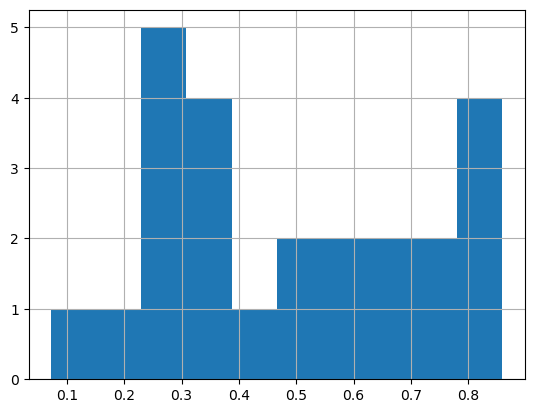

In [15]:
sampled_test_metadata['prediction_similarity'].hist()

### check the distribution of generated EC numbers

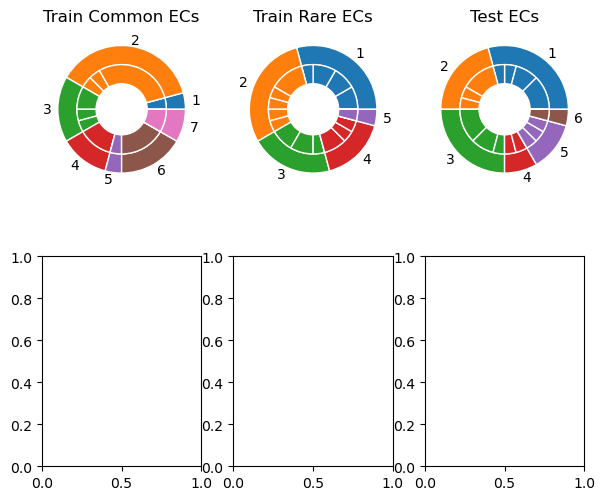

In [17]:
sampled_common_df = pd.DataFrame({'EC number': sampled_common})
sampled_rare_df = pd.DataFrame({'EC number': sampled_rare})
fig = make_pie_charts(['Train Common ECs', 'Train Rare ECs', 'Test ECs'], [sampled_common_df, sampled_rare_df, sampled_test_metadata])

In [18]:
import matplotlib.pyplot as plt
fig.savefig('figures/ECs_pie_chart.svg')

<Figure size 640x480 with 0 Axes>

### load the full datasets and plot the pie charts

In [20]:
train_df = pd.read_csv('data/CARE_resampled50cluster_medium_withTax/train.csv')
test_df = pd.read_csv('data/CARE_resampled50cluster_medium_withTax/test.csv')
val90_df = pd.read_csv('data/CARE_resampled50cluster_medium_withTax/val90.csv')
val70_df = pd.read_csv('data/CARE_resampled50cluster_medium_withTax/val70.csv')

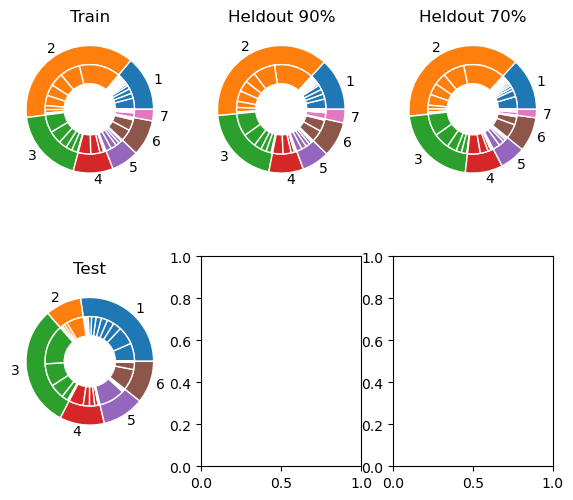

In [21]:
fig = make_pie_charts(['Train', 'Heldout 90%', 'Heldout 70%', 'Test'], [train_df, val90_df, val70_df, test_df])

In [22]:
fig.savefig('figures/dataset_pie_chart.svg')

In [47]:
#fully random
# sampled_test = test_metadata['EC number'].value_counts().sample(24, random_state=42).index.tolist()
# sampled_test